# Example analysis
## All properties added to rent in London in the last 24 hours

In [1]:
# Imports etc.
import pandas as pd
import matplotlib.pyplot as plt
import rightmove_webscraper
%matplotlib inline

# URL for all London properties to rent, added in last 24hrs
url = "http://www.rightmove.co.uk/property-to-rent/\
find.html?locationIdentifier=REGION%5E87490\
&maxDaysSinceAdded=1&includeLetAgreed=false"

# Scrape the webpage
rightmove_data = rightmove_webscraper.rightmove_data(url)

# Create the DataFrame of results
df = rightmove_data.get_results()

# Look at some of the results
df.tail()

,address,agent_url,price,type,url,postcode,number_bedrooms,search_date
1045,"Sutherland Avenue, Maida Vale, London, W9",http://www.rightmove.co.uk/estate-agents/agent...,2318,2 bedroom flat,http://www.rightmove.co.uk/property-to-rent/pr...,W9,2,2018-01-10 21:24:14.259711
1046,"Linden Way, South Gate, N14",http://www.rightmove.co.uk/estate-agents/agent...,2000,4 bedroom house,http://www.rightmove.co.uk/property-to-rent/pr...,N14,4,2018-01-10 21:24:14.259711
1047,"Upper Berkeley Street, London, W1H",http://www.rightmove.co.uk/estate-agents/agent...,2123,1 bedroom apartment,http://www.rightmove.co.uk/property-to-rent/pr...,W1H,1,2018-01-10 21:24:14.259711
1048,"Conway Street, Fitzrovia, W1T",http://www.rightmove.co.uk/estate-agents/agent...,1950,1 bedroom flat,http://www.rightmove.co.uk/property-to-rent/pr...,W1T,1,2018-01-10 21:24:14.259711
1049,"Tidemill Square, SE10",http://www.rightmove.co.uk/estate-agents/agent...,2449,2 bedroom apartment,http://www.rightmove.co.uk/property-to-rent/pr...,SE10,2,2018-01-10 21:24:14.259711


In [2]:
# Quick look at the shape of the data.
df.describe()

,price
count,1050.000000
mean,2187.238095
std,1933.690156
min,85.000000
25%,1400.000000
50%,1748.000000
75%,2383.000000
max,43333.000000


In [3]:
# See which 'types' don't have bedroom number extracted
list(df[df.number_bedrooms.isnull()].type.unique())

['House share',
 'Detached house',
 'House of multiple occupation',
 'Garages',
 'Flat share']

In [4]:
# Create a DataFrame with summary statistics by number of bedrooms.
funcs = ["mean", "count"]
grouped_df = pd.DataFrame(df.groupby(["number_bedrooms"])["price"].agg(funcs).astype(int))
grouped_df.rename(columns={"mean":"average_price"}, inplace=True)
grouped_df

,average_price,count
number_bedrooms,,
0,1233,96
1,1625,320
2,2159,410
3,3232,143
4,3957,49
5,5112,12
6,43333,1


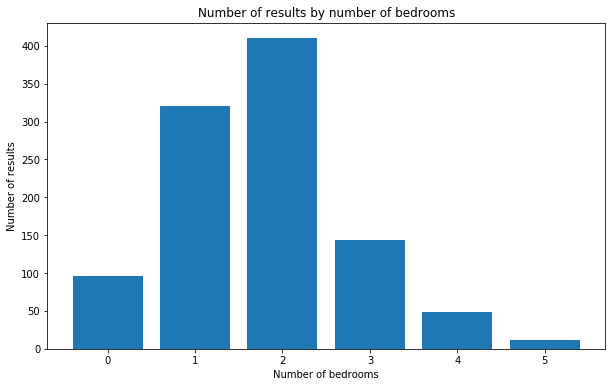

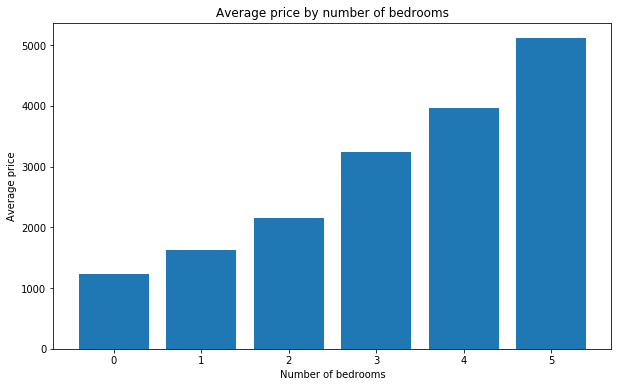

In [5]:
# Drop the outlier for plotting.
grouped_df.drop(labels="6", axis=0, inplace=True)

# Create plots to visualise results by number of bedrooms.
plt.figure(num=1,figsize=(10,6))
plt.bar(grouped_df.index.astype(int), grouped_df["count"], align="center")
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of results")
plt.title("Number of results by number of bedrooms")
# plt.ticklabel_format(style="plain")

plt.figure(num=2,figsize=(10,6))
plt.bar(grouped_df.index.astype(int), grouped_df["average_price"],align="center")
plt.xlabel("Number of bedrooms")
plt.ylabel("Average price")
plt.title("Average price by number of bedrooms")
# plt.ticklabel_format(style="plain")
plt.show()

## Using post codes to find the property borough
Using data downloaded from https://www.doogal.co.uk/PostcodeDownloads.php we can now merge in additional post code data to analyse the differences in pricing between London boroughs. Also from Wikipedia (<a href="https://en.wikipedia.org/wiki/Outer_London">here</a> and <a href="https://en.wikipedia.org/wiki/Inner_London">here</a>) we can identify whether the borough is classified as 'Inner' or 'Outer' London, and look at the price differences between the two classifications.

In [6]:
# Read in the csv
postcodes_df = pd.read_csv("./resources/London postcodes.csv", low_memory=False)
postcodes_df.tail()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation
317301,WD3 8UX,Yes,51.626868,-0.495128,504264,193078,TQ042930,Greater London,Hillingdon,Harefield,...,45,7,E01002438,NaN,E02000496,Hillingdon 003,NaN,E00012152,E14000906,22884
317302,WD3 8UZ,Yes,51.626955,-0.494143,504332,193089,TQ043930,Greater London,Hillingdon,Harefield,...,46,7,E01002438,NaN,E02000496,Hillingdon 003,NaN,E00012152,E14000906,22884
317303,WD3 8XD,Yes,51.628575,-0.499204,503978,193262,TQ039932,Greater London,Hillingdon,Harefield,...,45,7,E01002438,NaN,E02000496,Hillingdon 003,NaN,E00012152,E14000906,22884
317304,WD6 2RN,Yes,51.643262,-0.256027,520770,195269,TQ207952,Greater London,Barnet,Underhill,...,113,6,E01000290,NaN,E02000030,Barnet 007,NaN,E00001422,E14000636,11173
317305,WD6 2RW,Yes,51.642309,-0.256627,520731,195162,TQ207951,Greater London,Barnet,Underhill,...,114,6,E01000290,NaN,E02000030,Barnet 007,NaN,E00001422,E14000636,11173


In [7]:
# The columns we're interested in are Postcode and District, so drop the rest.
cols_to_drop = postcodes_df.columns.drop(["Postcode", "District"])
postcodes_df.drop(labels = cols_to_drop, axis=1, inplace=True)
postcodes_df.tail()

,Postcode,District
317301,WD3 8UX,Hillingdon
317302,WD3 8UZ,Hillingdon
317303,WD3 8XD,Hillingdon
317304,WD6 2RN,Barnet
317305,WD6 2RW,Barnet


In [8]:
# We only want the stem of the postcode (e.g. from "N1 6RQ", we just want "N1")
postcodes_df["postcode_stem"] = postcodes_df["Postcode"].str.split(" ").str.get(0)

# # Drop the full postcode column
# postcodes_df.drop(labels="Postcode", axis=1, inplace=True)

# # Drop duplicate rows and reset index
# postcodes_df.drop_duplicates(inplace=True)
# postcodes_df.reset_index(drop=True, inplace=True)

# Look at the DataFrame
postcodes_df.tail()

,Postcode,District,postcode_stem
317301,WD3 8UX,Hillingdon,WD3
317302,WD3 8UZ,Hillingdon,WD3
317303,WD3 8XD,Hillingdon,WD3
317304,WD6 2RN,Barnet,WD6
317305,WD6 2RW,Barnet,WD6


Using this DataFrame we could now merge the "postcode_stem" column with the postcode column in the main Dataframe. However there is one more issue that needs to be dealt with, which is that some postcodes cross multiple districts, for example N1:

In [9]:
list(postcodes_df[postcodes_df["postcode_stem"]=="N1"]["District"].unique())

['Islington', 'Camden', 'Hackney']

We will deal with this by taking a pivot table of <code>postcode_stem<code> by <code>District</code>, and then keeping the District with the maximum count.

In [10]:
# Create a pivot table of the postcode stem by how many full postcodes sit in each District.
pivot = pd.DataFrame(pd.pivot_table(postcodes_df, values="Postcode", 
                                    index = "postcode_stem", columns="District",
                                    aggfunc="count"))

# Keep the max District count for each postcode_stem
pc_lookup = pd.DataFrame(pivot.idxmax(axis=1))
pc_lookup.reset_index(inplace=True)
pc_lookup.head()

,postcode_stem,0
0,BR1,Bromley
1,BR2,Bromley
2,BR3,Bromley
3,BR4,Bromley
4,BR5,Bromley


In [11]:
# Rename the columns
pc_lookup.rename(columns={"postcode_stem":"postcode",0:"London_borough"}, inplace=True)
pc_lookup.head()

,postcode,London_borough
0,BR1,Bromley
1,BR2,Bromley
2,BR3,Bromley
3,BR4,Bromley
4,BR5,Bromley


Now we use the second file to label the boroughs as either inner or outer London.

In [12]:
# Read in the CSV.
in_out = pd.read_csv("./resources/inner_outer_london.csv")
in_out.tail()

,District,Inner_Outer
28,Sutton,Outer
29,Tower Hamlets,Inner
30,Waltham Forest,Outer
31,Wandsworth,Inner
32,Westminster,Inner


In [13]:
# Merge into 1 DataFrame
lookup_df = pd.merge(left=pc_lookup, right=in_out, how="left",
                     left_on="London_borough", right_on="District")
lookup_df.drop(axis=1, labels=["District"], inplace=True)
lookup_df.tail()

,postcode,London_borough,Inner_Outer
324,WC99,Camden,Inner
325,WD2,Harrow,Outer
326,WD23,Harrow,Outer
327,WD3,Hillingdon,Outer
328,WD6,Barnet,Outer


Now we can merge the final lookup_df data into our main DataFrame.

In [14]:
df = pd.merge(left=df, right=lookup_df, how="left",
              left_on="postcode", right_on="postcode")
df.tail()

,address,agent_url,price,type,url,postcode,number_bedrooms,search_date,London_borough,Inner_Outer
1045,"Sutherland Avenue, Maida Vale, London, W9",http://www.rightmove.co.uk/estate-agents/agent...,2318,2 bedroom flat,http://www.rightmove.co.uk/property-to-rent/pr...,W9,2,2018-01-10 21:24:14.259711,Westminster,Inner
1046,"Linden Way, South Gate, N14",http://www.rightmove.co.uk/estate-agents/agent...,2000,4 bedroom house,http://www.rightmove.co.uk/property-to-rent/pr...,N14,4,2018-01-10 21:24:14.259711,Enfield,Outer
1047,"Upper Berkeley Street, London, W1H",http://www.rightmove.co.uk/estate-agents/agent...,2123,1 bedroom apartment,http://www.rightmove.co.uk/property-to-rent/pr...,W1H,1,2018-01-10 21:24:14.259711,Westminster,Inner
1048,"Conway Street, Fitzrovia, W1T",http://www.rightmove.co.uk/estate-agents/agent...,1950,1 bedroom flat,http://www.rightmove.co.uk/property-to-rent/pr...,W1T,1,2018-01-10 21:24:14.259711,Camden,Inner
1049,"Tidemill Square, SE10",http://www.rightmove.co.uk/estate-agents/agent...,2449,2 bedroom apartment,http://www.rightmove.co.uk/property-to-rent/pr...,SE10,2,2018-01-10 21:24:14.259711,Greenwich,Inner


Check if all the rows in the DataFrame have been allocated a borough and inner/outer classification - easiest way to do this is just to see there are any null values for inner/outer.

In [15]:
print("{} rows out of {} ({}%) do not have a postcode recorded".format(len(df[df["Inner_Outer"].isnull()]), 
                                                                       len(df),
                                                                       int(len(df[df["Inner_Outer"].isnull()])/len(df)*100)))

250 rows out of 1050 (23%) do not have a postcode recorded


## Now get some useful information!
### Price of 1 bedrooms apartments to rent by borough
Now we'll remove the records without location information, and analyse the rest to get some useful information from the data.

In [16]:
# List all boroughs from cheapest to most expensive.
one_beds = df[(df["Inner_Outer"].notnull()) & (df["number_bedrooms"]=="1")]
one_beds_by_borough = pd.DataFrame(one_beds.groupby(["London_borough"])["price"].mean().astype(int).sort_values())
one_beds_by_borough

,price
London_borough,
Enfield,875
Waltham Forest,950
Croydon,980
Newham,1053
Barnet,1094
Redbridge,1250
Greenwich,1252
Haringey,1300
Lewisham,1300


Now we'll focus just on Inner London boroughs, find the cheapest borough, and print a list of the cheapest recent listings in that borough:

In [18]:
inner_df = one_beds[one_beds["Inner_Outer"]=="Inner"].groupby(["London_borough"], as_index=False)["price"].mean()
min_borough = inner_df[inner_df["price"]==inner_df["price"].min()]["London_borough"].values[0]
min_price = inner_df[inner_df["price"]==inner_df["price"].min()]["price"].astype(int).values[0]

print("""Cheapest Inner London borough to rent 1 beds: \n
\t{}\n
with average price: \n
\t£{}\n
Cheapest current listings are:
""".format(min_borough, min_price))
borough_listings = df[df["London_borough"]==min_borough][["url", "price"]].sort_values(by="price").reset_index(drop=True)
for row in range(len(borough_listings)):
    if borough_listings.loc[row, "price"] <= min_price:
        print("£{} - {}".format(int(borough_listings.loc[row, "price"]), borough_listings.loc[row, "url"]))

Cheapest Inner London borough to rent 1 beds: 

	Greenwich

with average price: 

	£1252

Cheapest current listings are:

£600 - http://www.rightmove.co.uk/property-to-rent/property-49619874.html
£950 - http://www.rightmove.co.uk/property-to-rent/property-63971018.html
£1100 - http://www.rightmove.co.uk/property-to-rent/property-48293962.html
£1100 - http://www.rightmove.co.uk/property-to-rent/property-70926188.html
£1127 - http://www.rightmove.co.uk/property-to-rent/property-52383597.html
£1150 - http://www.rightmove.co.uk/property-to-rent/property-70934006.html
£1150 - http://www.rightmove.co.uk/property-to-rent/property-70933067.html
£1200 - http://www.rightmove.co.uk/property-to-rent/property-70932020.html
£1200 - http://www.rightmove.co.uk/property-to-rent/property-70934984.html
£1200 - http://www.rightmove.co.uk/property-to-rent/property-15848773.html
£1248 - http://www.rightmove.co.uk/property-to-rent/property-70735481.html
£1250 - http://www.rightmove.co.uk/property-to-rent/pro